In [1]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def load_var_from_mat(mat_file_name, varname):
    try:
        data = loadmat(mat_file_name)
        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')
        var = data[varname][()]
    return var

In [4]:
pth_mat = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\volcell_super_good_version\liver_old_vol\liver_table.mat'
data_raw = load_var_from_mat(pth_mat, 'liver_table')

In [14]:
colnames = ['reg_centroid_x',
'reg_centroid_y',
'Centroid_x',
'Centroid_y',
'Area',
'Perimeter',
'Circularity',
'Aspect Ratio',
'compactness',
'eccentricity',
'extent',
'form_factor',
'maximum_radius',
'mean_radius',
'median_radius',
'minor_axis_length',
'major_axis_length',
'orientation_degrees',
'r_mean_intensity_norm',
'g_mean_intensity_norm',
'b_mean_intensity_norm',
'slide_num']

In [15]:
df = pd.DataFrame(np.transpose(data_raw), columns=colnames)

In [16]:
df.head()

,reg_centroid_x,reg_centroid_y,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,...,maximum_radius,mean_radius,median_radius,minor_axis_length,major_axis_length,orientation_degrees,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm,slide_num
0,2737.670654,1315.016968,23022.0,9934.0,126.324829,40.572639,0.964344,1.143750,13.031002,0.485356,...,7.652023,6.333393,6.208154,11.926326,13.640738,4953.127930,-1.130252,-2.442952,-2.470535,181.0
1,2800.663818,1248.846924,23424.0,9566.0,70.461174,32.037445,0.862669,1.092756,14.566857,0.403187,...,5.576528,4.743773,4.742319,9.148310,9.996868,3235.429932,-1.253668,-1.792261,-1.569824,181.0
2,2775.001465,1209.805542,23258.0,9382.0,137.169479,41.980198,0.978089,1.045216,12.847879,0.290944,...,7.564113,6.606557,6.604823,12.983445,13.570502,1647.901001,0.353788,-0.690295,-0.580998,181.0
3,2763.458496,1329.821045,23174.0,10010.0,64.644943,31.310467,0.828639,1.131726,15.165073,0.468231,...,5.621082,4.542308,4.500757,8.675959,9.818809,3058.329102,0.976964,-1.340248,-0.860567,181.0
4,2789.617676,1262.128540,23358.0,9642.0,94.547668,35.956200,0.918995,1.138517,13.674036,0.478045,...,6.268075,5.492355,5.481108,10.396406,11.836490,2094.899414,-1.207197,-2.859513,-2.489028,181.0


In [94]:
cols_to_select = list(range(4, 14)) + [15,16,18,19,20]

df.columns[cols_to_select]

Index(['Area', 'Perimeter', 'Circularity', 'Aspect Ratio', 'compactness',
       'eccentricity', 'extent', 'form_factor', 'maximum_radius',
       'mean_radius', 'minor_axis_length', 'major_axis_length',
       'r_mean_intensity_norm', 'g_mean_intensity_norm',
       'b_mean_intensity_norm'],
      dtype='object')

In [95]:
cols_to_select

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20]

In [96]:
test = df.iloc[1:1000, cols_to_select]

<Axes: >

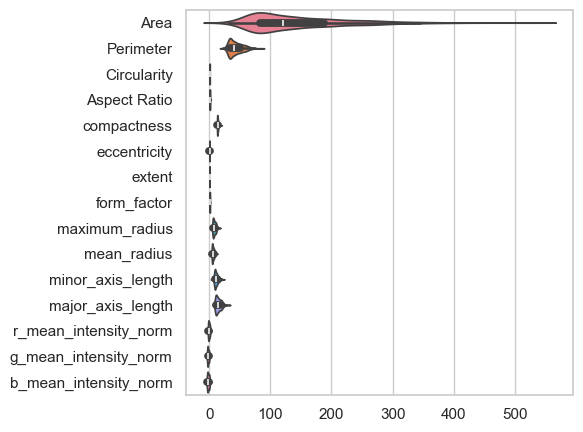

In [97]:
fig, axes = plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
sns.violinplot(data=test, ax = axes, orient ='h')

In [136]:
test.columns

Index(['Area', 'Perimeter', 'Circularity', 'Aspect Ratio', 'compactness',
       'eccentricity', 'extent', 'form_factor', 'maximum_radius',
       'mean_radius', 'minor_axis_length', 'major_axis_length',
       'r_mean_intensity_norm', 'g_mean_intensity_norm',
       'b_mean_intensity_norm'],
      dtype='object')

In [137]:
good_names = ['Area', 'Perimeter', 'Circularity', 'Aspect Ratio', 'Compactness',
       'Eccentricity', 'Extent', 'Form Factor', 'Maximum Radius',
       'Mean Radius', 'Minor Axis Length', 'Major Axis Length',
       'Normalized Mean R Intensity', 'Normalized Mean G Intensity',
       'Normalized Mean B Intensity']

In [150]:
cols = test.columns

df_sample = df.sample(frac=.05).reset_index(drop=True)

# Loop through columns and create a separate plot for each
for i,col in enumerate(cols):
    print(i)
    fig, ax = plt.subplots(figsize=(8, 6))
    
    dat = df_sample[col]
    
    sns.violinplot(data=dat, ax=ax, orient='v')
    # ax.set_title(col, fontsize=14)  # Set horizontal title for the plot
    ax.set_ylabel(good_names[i], fontsize=20)
    plt.tight_layout()
    plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\pdfs\{col}_plot.png', dpi=300)  # Save the plot as a PDF file
    plt.close()  # Close the current figure to free up memory

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [193]:
pca_cols = ['Area', 'Perimeter', 'Circularity', 'Aspect Ratio',
       'eccentricity', 'maximum_radius',
       'mean_radius', 'minor_axis_length', 'major_axis_length',
       'r_mean_intensity_norm', 'g_mean_intensity_norm',
       'b_mean_intensity_norm']
pca_cols = [df.columns.get_loc(name) for name in pca_cols if name in df.columns]

In [194]:
pca_cols

[4, 5, 6, 7, 9, 12, 13, 15, 16, 18, 19, 20]

In [195]:
df_sample = df.sample(frac=.05).reset_index(drop=True).iloc[:,pca_cols]

In [214]:
from sklearn.decomposition import PCA

In [223]:
df_sample2 = df.sample(frac=.05).reset_index(drop=True).iloc[:,pca_cols]
pca2=PCA()
pca2.fit(df_sample2)
pca2.explained_variance_ratio_

array([9.98017389e-01, 1.17918878e-03, 5.13077363e-04, 1.94374339e-04,
       5.12852733e-05, 2.68687928e-05, 9.98005648e-06, 4.61146260e-06,
       2.19511522e-06, 8.19257158e-07, 1.96067724e-07, 1.42534361e-08])

In [226]:
df_sample2.head()

,Area,Perimeter,Circularity,Aspect Ratio,eccentricity,maximum_radius,mean_radius,minor_axis_length,major_axis_length,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm
0,77.068344,32.762657,0.902252,1.018830,0.191372,5.790635,4.951487,9.883533,10.069643,-1.071739,-1.793508,-1.772324
1,246.805695,57.507755,0.937804,1.125816,0.459371,10.138765,8.852196,16.914507,19.042625,1.120533,0.122473,0.371234
2,103.666298,37.150101,0.943903,1.096466,0.410144,6.291842,5.747756,11.053602,12.119904,-1.086761,-1.561867,-1.355044
3,74.149399,36.098671,0.715048,2.049726,0.872916,10.445731,4.443530,6.967080,14.280602,1.884270,1.095245,0.962086
4,73.428291,39.207291,0.600260,3.134906,0.947758,11.103372,4.324407,5.679647,17.805161,-0.385887,-0.344152,-0.262739


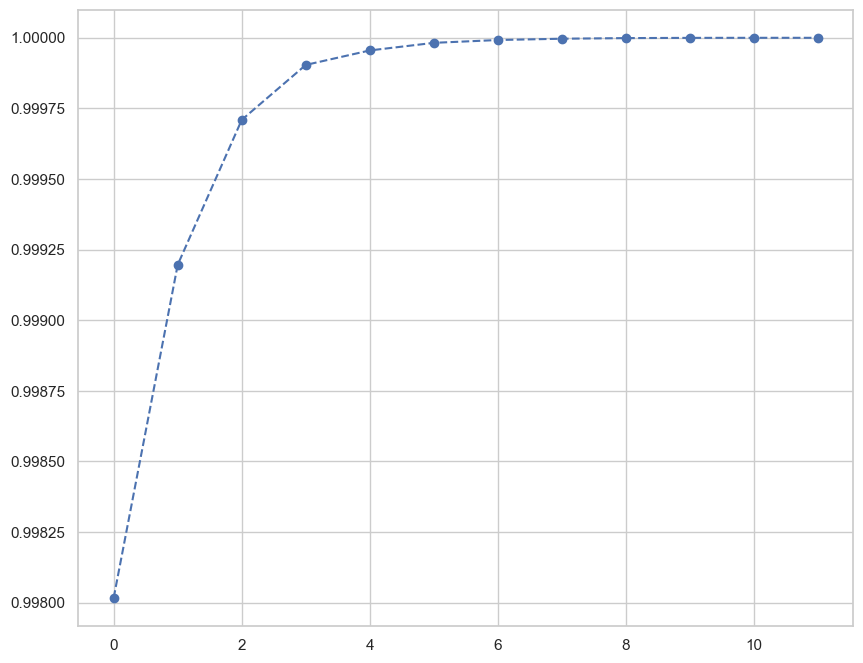

In [227]:
plt.figure(figsize=(10,8))
plt.plot(range(0,len(df_sample2.columns)), pca2.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

In [230]:
pca = PCA(n_components=2)
pca.fit(df_sample2)
pca.transform(df_sample2)
scores_pca = pca.transform(df_sample2)

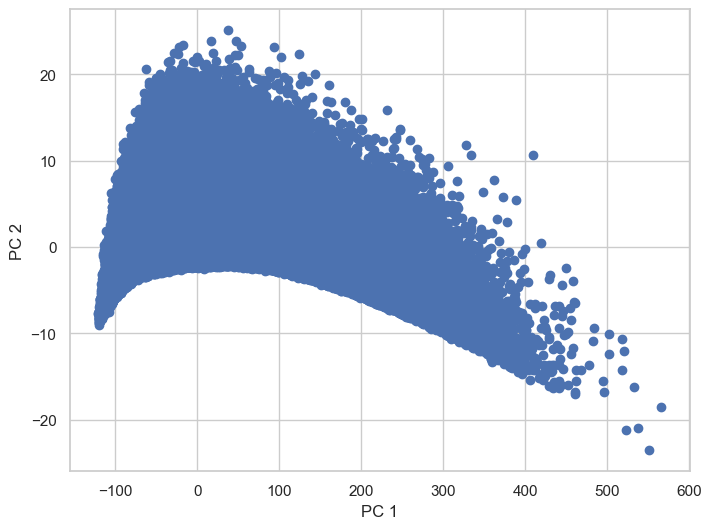

In [232]:
# Plot the transformed data (principal components)
plt.figure(figsize=(8, 6))
plt.scatter(scores_pca[:, 0], scores_pca[:, 1], color='b', label='Principal Components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\pdfs\pca_plot.png', dpi=300)  # Save the plot as a PDF file
plt.show()